In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train_loan.csv')
print('Displaying top 5 rows ...')
df.head()

Displaying top 5 rows ...


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print('size of the training sample:',df.shape)

size of the training sample: (614, 13)


In [4]:
print('checking columns types: \n')
df.dtypes

checking columns types: 



Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
print('Let''s have a look on missing values:\n')
df.isna().sum()

Lets have a look on missing values:



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Loan_ID is useless.
df.drop(labels='Loan_ID',axis=1,inplace=True)

Categorical columns in more details

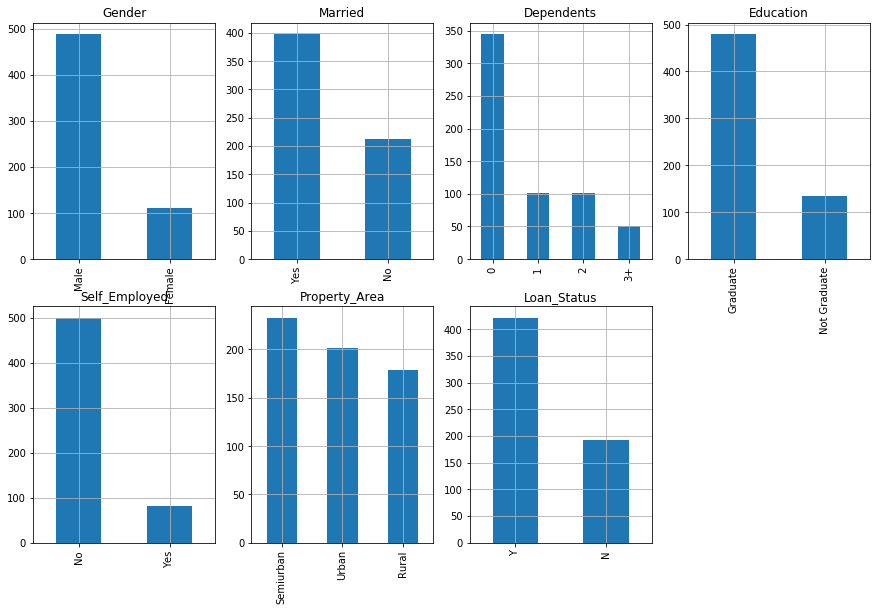

In [7]:
plt.figure(figsize=(15,20))
c = 1
for i in df.columns:
    if(df[i].dtype=='object'):
        plt.subplot(4,4,c)
        df[i].value_counts().plot(kind='bar',title=i,grid=True)
        c = c+1

Numerical columns in more details

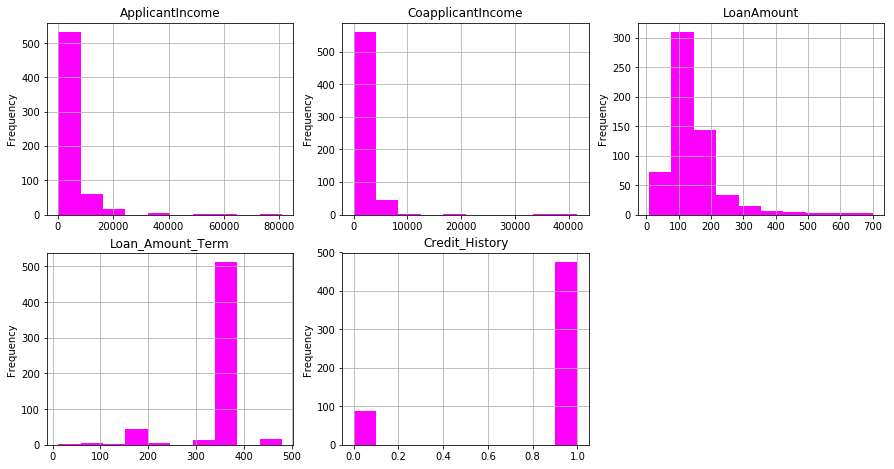

In [8]:
plt.figure(figsize=(15,12))
c = 1
for i in df.columns:
    if(df[i].dtype!='object'):
        plt.subplot(3,3,c)
        df[i].plot(kind='hist',title=i, grid=True, color='magenta')
        c = c+1

In [9]:
#create a copy of df to transform the qualitative data into numeric
df2 = df.copy()
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Since we have missing values, we need to fill them.

For non-numerical data, I use the __most frequent__ strategy and the __mean__ value for other columns.

After the transformation, no missing data as we can see below.

In [10]:
for i in df2.columns:    
    try:
        imputer = SimpleImputer(strategy='mean')
        df2[i] = imputer.fit_transform(df2[i].values.reshape(-1,1))
    except:
        imputer = SimpleImputer(strategy='most_frequent')
        df2[i] = imputer.fit_transform(df2[i].values.reshape(-1,1))

In [11]:
df2.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Below are the correlation matrix and the pairplot for numeric values

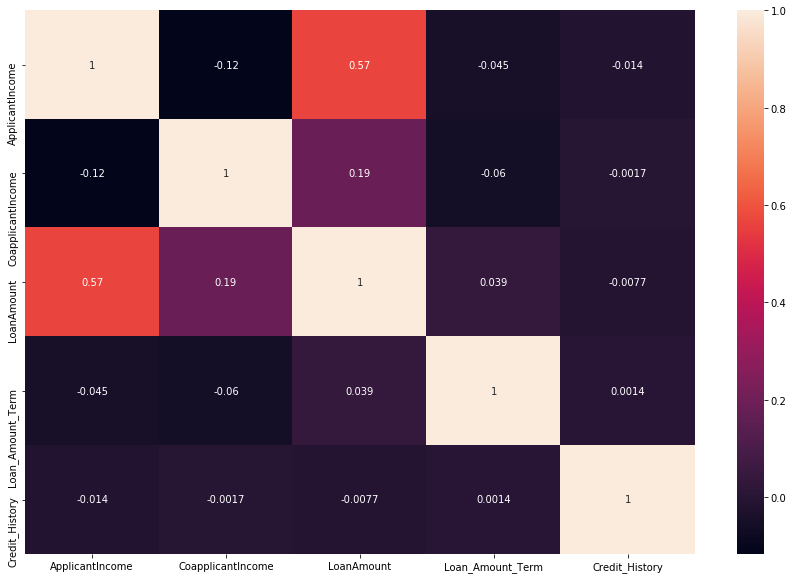

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True);

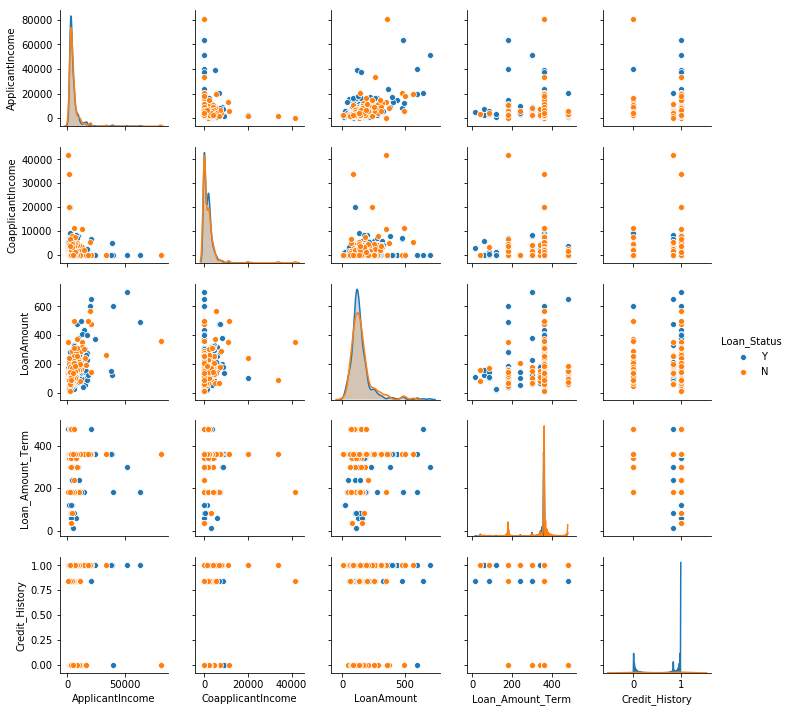

In [13]:
sns.pairplot(df2, hue='Loan_Status', height=2);

Exploring the presence of outliers

It clearly appears that some of the features have some outliers

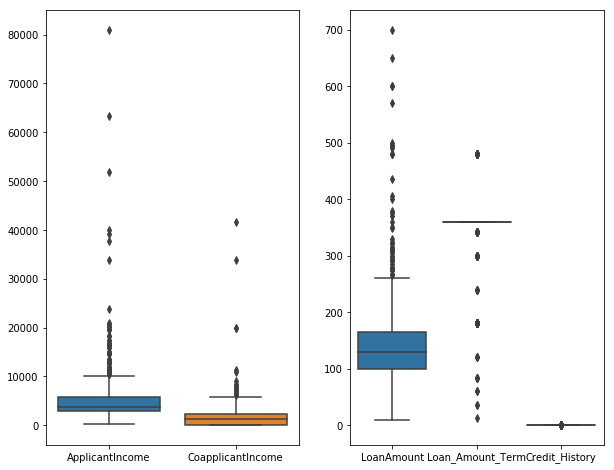

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(data=df2[['ApplicantIncome','CoapplicantIncome']]);
plt.subplot(1,2,2)
sns.boxplot(data=df2[['LoanAmount','Loan_Amount_Term','Credit_History']]);

In [15]:
df2[df2.ApplicantIncome==df2.ApplicantIncome.max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3+,Graduate,No,81000.0,0.0,360.0,360.0,0.0,Rural,N


Encoding Non-numerical features to categorical.

In [16]:
le = LabelEncoder()
for i in df2.columns:
    if(df2[i].dtype=='object'):
        df2[i] = le.fit_transform(df2[i])

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


In [17]:
#sc = StandardScaler()
#df2.LoanAmount = sc.fit_transform(df2.LoanAmount.values.reshape(-1,1))

Selecting features and target

In [18]:
X = df2.drop(labels='Loan_Status',axis=1)
X = X.values
y =df2.Loan_Status.values

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=3)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
log_reg = LogisticRegression(solver='liblinear')
dt = DecisionTreeClassifier(max_depth=5)
nb = GaussianNB()

In [22]:
clf = [log_reg,dt,nb]
score_train = []
score_test = []
for model in clf:
    model.fit(X_train,y_train)
    score_train.append((model.__class__.__name__,model.score(X_train,y_train)))
    score_test.append((model.__class__.__name__,model.score(X_test,y_test)))

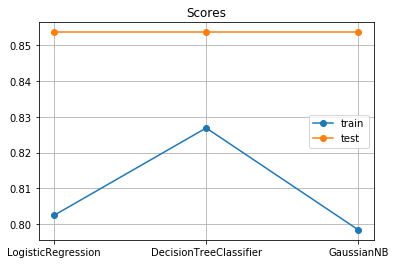

In [23]:
for s in [score_train,score_test]:
    x = [s[i][0] for i in range(len(s))]
    y = [s[i][1] for i in range(len(s))]
    plt.plot(x,y,'-o')

    
plt.legend(('train','test'))
plt.grid()
plt.title('Scores');

In [24]:
for model in clf:
    print("\n Classification report for classifier %s:\n%s\n"
      % (model.__class__.__name__,classification_report(y_test, model.predict(X_test))))
    print("Confusion matrix:\n%s" % confusion_matrix(y_test, model.predict(X_test)))
    print('-----------------------------------------------------------------')


 Classification report for classifier LogisticRegression:
              precision    recall  f1-score   support

           0       0.86      0.43      0.57        28
           1       0.85      0.98      0.91        95

   micro avg       0.85      0.85      0.85       123
   macro avg       0.86      0.70      0.74       123
weighted avg       0.85      0.85      0.83       123


Confusion matrix:
[[12 16]
 [ 2 93]]
-----------------------------------------------------------------

 Classification report for classifier DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1       0.86      0.97      0.91        95

   micro avg       0.85      0.85      0.85       123
   macro avg       0.84      0.72      0.75       123
weighted avg       0.85      0.85      0.84       123


Confusion matrix:
[[13 15]
 [ 3 92]]
-----------------------------------------------------------------

 Classification

In [25]:
a = {'gender': '0', 'married': '0', 'dependents': '0', 'education': '0', 'employed': '0', 'appincome': '234432', 'coappincome': '0', 'amount': '569', 'term': '349', 'credit': '0', 'area': '0'}

In [42]:
type(np.array([list(map(int,list(a.values())))]))

numpy.ndarray

In [47]:
## reading test sample
test = pd.read_csv('test_loan.csv')
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [48]:
# dropping the first column
test.drop(labels='Loan_ID',axis=1,inplace=True)

In [49]:
# imputing missing values
for i in test.columns:    
    try:
        imputer = SimpleImputer(strategy='mean')
        test[i] = imputer.fit_transform(df2[i].values.reshape(-1,1))
    except:
        imputer = SimpleImputer(strategy='most_frequent')
        test[i] = imputer.fit_transform(test[i].values.reshape(-1,1))

In [50]:
# Encoding non-numeric column
le = LabelEncoder()
for i in test.columns:
    if(test[i].dtype=='object'):
        test[i] = le.fit_transform(test[i])

test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
6,0,0,1,1,0,2226,0,59.0,360.0,1.0,1
7,1,1,2,1,0,3881,0,147.0,360.0,0.0,0
8,1,1,2,0,0,13633,0,280.0,240.0,1.0,2
9,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1


In [225]:
#test = test.values
y_pred_proba = log_reg.predict_proba(test)
y_pred = log_reg.predict(test)    

FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 


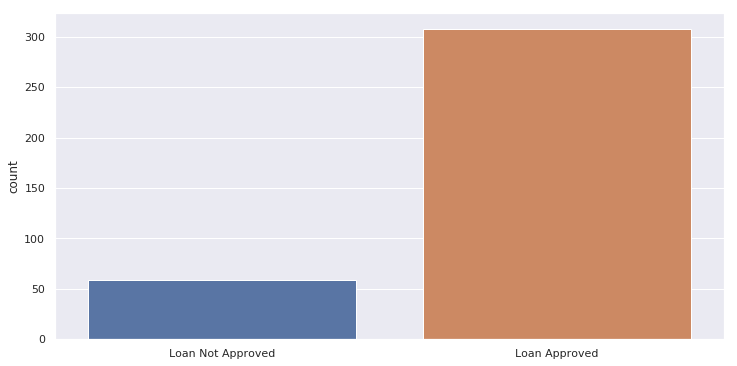

In [226]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x=y_pred)
ax.set_xticklabels(["Loan Not Approved","Loan Approved"])
print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")

In [230]:
output = pd.read_csv('test_loan.csv')
output['Loan_Status'] =  pd.Series(y_pred)
output.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [231]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [232]:
with open("test_loan.csv") as fp:
    csv = fp.read()

In [233]:
csv

'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\nLP001094,Male,Yes,2,Graduate,,12173,0,166,360,0,Semiurban\nLP001096,Female,No

In [223]:
from sklearn.externals import joblib
# save model
joblib.dump(log_reg, 'model.pkl')

['model.pkl']